In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import trading_vix_and_spy_utils

In [2]:
data_names = []
new_column_names = []

folder_name = 'raw_data'
for entry_name in ['SPY','VIXY','QQQ','DIA']:
    for entry_type in ['ASK','BID','OPTION_IMPLIED_VOLATILITY']:
        data_names.append("./"+folder_name+'/'+entry_name+'_3000D_1hour_'+entry_type+'.csv')
        new_column_names.append(entry_name+'_'+entry_type)
        
for entry_name in ['VIX']:
    for entry_type in ['TRADES','OPTION_IMPLIED_VOLATILITY']:
        data_names.append("./"+folder_name+'/'+entry_name+'_3000D_1hour_'+entry_type+'.csv')
        new_column_names.append(entry_name+'_'+entry_type)
        
print(data_names)
print(new_column_names)

['./raw_data/SPY_3000D_1hour_ASK.csv', './raw_data/SPY_3000D_1hour_BID.csv', './raw_data/SPY_3000D_1hour_OPTION_IMPLIED_VOLATILITY.csv', './raw_data/VIXY_3000D_1hour_ASK.csv', './raw_data/VIXY_3000D_1hour_BID.csv', './raw_data/VIXY_3000D_1hour_OPTION_IMPLIED_VOLATILITY.csv', './raw_data/QQQ_3000D_1hour_ASK.csv', './raw_data/QQQ_3000D_1hour_BID.csv', './raw_data/QQQ_3000D_1hour_OPTION_IMPLIED_VOLATILITY.csv', './raw_data/DIA_3000D_1hour_ASK.csv', './raw_data/DIA_3000D_1hour_BID.csv', './raw_data/DIA_3000D_1hour_OPTION_IMPLIED_VOLATILITY.csv', './raw_data/VIX_3000D_1hour_TRADES.csv', './raw_data/VIX_3000D_1hour_OPTION_IMPLIED_VOLATILITY.csv']
['SPY_ASK', 'SPY_BID', 'SPY_OPTION_IMPLIED_VOLATILITY', 'VIXY_ASK', 'VIXY_BID', 'VIXY_OPTION_IMPLIED_VOLATILITY', 'QQQ_ASK', 'QQQ_BID', 'QQQ_OPTION_IMPLIED_VOLATILITY', 'DIA_ASK', 'DIA_BID', 'DIA_OPTION_IMPLIED_VOLATILITY', 'VIX_TRADES', 'VIX_OPTION_IMPLIED_VOLATILITY']


In [3]:
#combine data

for index in range(0,len(data_names)):
    
    data_name = data_names[index]
    new_column_name = new_column_names[index]
    
    if index == 0:
        
        total_data = pd.read_csv(data_name)
        total_data = total_data.rename(columns = {"date":"date",\
                                "open":new_column_name+"_open",\
                                "high":new_column_name+'_high',\
                                'low':new_column_name+'_low',\
                                'close':new_column_name+'_close',\
                                'volume':new_column_name+'_volume'})
    
    else:
        
        new_data = pd.read_csv(data_name)
        new_data = new_data.rename(columns = {"date":"date",\
                                "open":new_column_name+"_open",\
                                "high":new_column_name+'_high',\
                                'low':new_column_name+'_low',\
                                'close':new_column_name+'_close',\
                                'volume':new_column_name+'_volume'})
        
        total_data = pd.merge(total_data,new_data,on = 'date',how = 'inner')

In [4]:
distiled_column_names = []
for entry in total_data.columns:
    if entry == "date":
        distiled_column_names.append(entry)
    elif 'close' in entry:
        distiled_column_names.append(entry)
        
total_data_distiled = pd.DataFrame()
for entry in distiled_column_names:
    total_data_distiled[entry] = total_data[entry]

In [5]:
total_data_distiled.head()

,date,SPY_ASK_close,SPY_BID_close,SPY_OPTION_IMPLIED_VOLATILITY_close,VIXY_ASK_close,VIXY_BID_close,VIXY_OPTION_IMPLIED_VOLATILITY_close,QQQ_ASK_close,QQQ_BID_close,QQQ_OPTION_IMPLIED_VOLATILITY_close,DIA_ASK_close,DIA_BID_close,DIA_OPTION_IMPLIED_VOLATILITY_close,VIX_TRADES_close,VIX_OPTION_IMPLIED_VOLATILITY_close
0,20130425 13:00:00,159.19,159.18,0.110709,4072.0,4068.0,0.635250,69.93,69.92,0.131616,146.51,146.50,0.104645,13.14,0.800028
1,20130425 14:00:00,158.75,158.74,0.115900,4124.0,4116.0,0.642219,69.83,69.82,0.132854,146.15,146.14,0.105423,13.57,0.710559
2,20130425 15:00:00,158.55,158.54,0.117281,4156.0,4152.0,0.654300,69.79,69.78,0.135330,145.95,145.93,0.107169,13.74,0.702653
3,20130426 09:30:00,158.54,158.53,0.119964,4184.0,4180.0,0.669714,69.70,69.69,0.134743,146.17,146.15,0.109439,13.79,0.864462
4,20130426 10:00:00,158.06,158.05,0.123853,4224.0,4220.0,0.684652,69.49,69.48,0.137187,145.98,145.97,0.111106,14.11,0.743451


In [6]:
# import matplotlib.pyplot as plt
# plt.plot(total_data_distiled['VIXM_BID_close'])
# plt.show()

In [7]:
window_lengths = [50,100,200,300,400,500]

In [8]:
index_begin_at = total_data_distiled.columns.tolist().index('VIX_TRADES_close')+1


#window_lengths = [10,30,50,100,200,300,400,500]

for index in range(0,len(window_lengths)):
    window_length = window_lengths[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = 'VIX_TRADES_close_'+str(window_length)+"_slope"
    
    new_data = trading_vix_and_spy_utils.compute_slope_feature(total_data_distiled,'VIX_TRADES_close',window_length)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [9]:
index_begin_at = total_data_distiled.columns.tolist().index('VIX_TRADES_close_200_slope')+1


window_multipliers = [2,3,4]
window_length = 50

for index in range(0,len(window_multipliers)):
    window_multiplier = window_multipliers[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = 'VIX_TRADES_close_'+str(window_length)+"_slope_"+str(window_multiplier)
    
    new_data = trading_vix_and_spy_utils.compute_previous_slope_feature(total_data_distiled,'VIX_TRADES_close',window_length,window_multiplier)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [10]:
#build features for vix based on vix6 trading environment
#compute the exponential moving average
mv_10 = total_data_distiled['VIX_TRADES_close'].ewm(span = 10).mean()
mv_20 = total_data_distiled['VIX_TRADES_close'].ewm(span = 20).mean()
mv_30 = total_data_distiled['VIX_TRADES_close'].ewm(span = 30).mean()
mv_50 = total_data_distiled['VIX_TRADES_close'].ewm(span = 50).mean()
mv_100 = total_data_distiled['VIX_TRADES_close'].ewm(span = 100).mean()

spot_to_mv_10 = total_data_distiled['VIX_TRADES_close']/mv_10
spot_to_mv_20 = total_data_distiled['VIX_TRADES_close']/mv_20
spot_to_mv_30 = total_data_distiled['VIX_TRADES_close']/mv_30
spot_to_mv_50 = total_data_distiled['VIX_TRADES_close']/mv_50
spot_to_mv_100 = total_data_distiled['VIX_TRADES_close']/mv_100

vix_measure = spot_to_mv_10+spot_to_mv_20+spot_to_mv_30+spot_to_mv_50+spot_to_mv_100
vix_measure_list = vix_measure.tolist()

index_begin_at = total_data_distiled.columns.tolist().index('VIX_OPTION_IMPLIED_VOLATILITY_close')+1
total_data_distiled.insert(loc = index_begin_at,column = 'vix_index_mv_ratio',value = vix_measure_list)

# index_begin_at = total_data_distiled.columns.tolist().index('vix_index_mv_ratio')+1
# threshold_list = [5.5,6,6.5]
# col_index_adder = 0
# for threshold in threshold_list:
#     counting_days = trading_vix_and_spy_utils.day_counter_helper(vix_measure_list,threshold)
#     total_data_distiled.insert(loc = index_begin_at+col_index_adder,column = 'vix_index_intervals_since_'+str(threshold),value = counting_days)
#     col_index_adder += 1

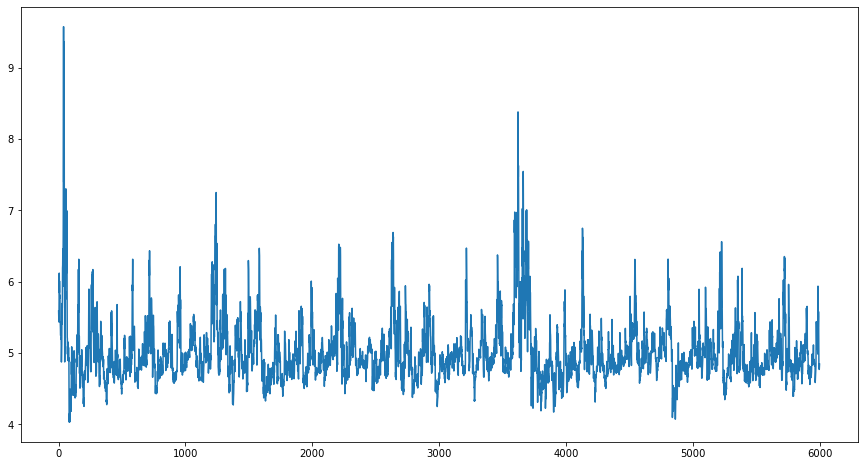

In [11]:
import matplotlib.pyplot as plt

plot_most_recent_intervals = 6000

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(vix_measure_list[-1*plot_most_recent_intervals:])
plt.show()

In [12]:
vix_cutoff = np.quantile(vix_measure_list,0.98)
print(vix_cutoff)

6.034224258735771


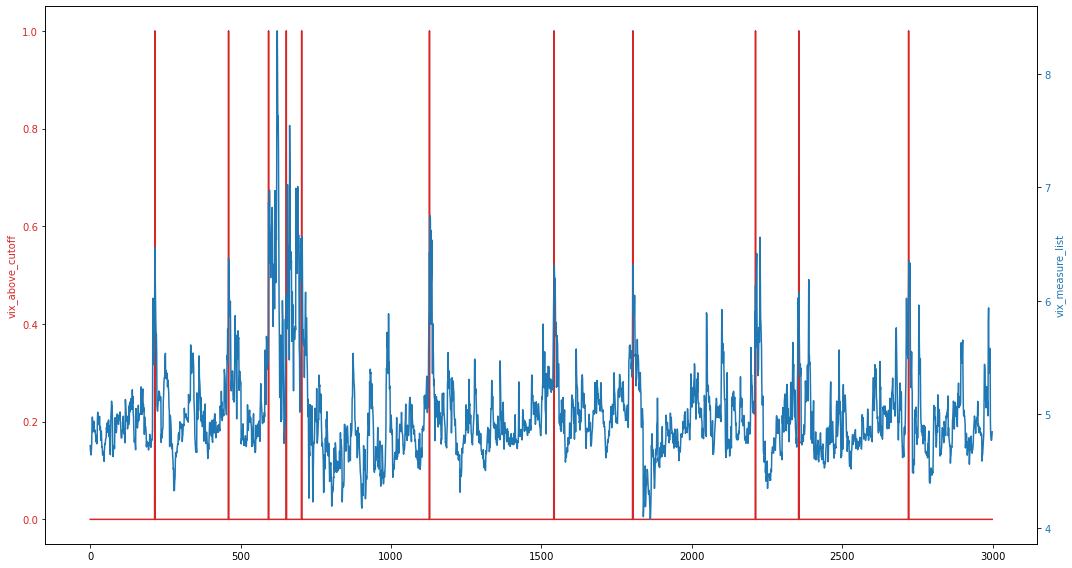

In [13]:
vix_above_cutoff = []
cluster_range = 50
last_vix_spike = float('-inf')

for index in range(0,len(vix_measure_list)):
    if vix_measure_list[index] >= vix_cutoff:
        if index-last_vix_spike > cluster_range:
            vix_above_cutoff.append(1)
            last_vix_spike = index
        else:
            vix_above_cutoff.append(0)
    else:
        vix_above_cutoff.append(0)
        
        
plot_most_recent_intervals = 3000
        
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
#ax1.set_xlabel('Hour')
ax1.set_ylabel('vix_above_cutoff', color=color)
ax1.plot(vix_above_cutoff[-1*plot_most_recent_intervals:], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('vix_measure_list', color=color)  # we already handled the x-label with ax1
ax2.plot(vix_measure_list[-1*plot_most_recent_intervals:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

#ax2.hlines(0.5,0,len(plot_prediction),colors = 'black')


plt.show()

In [14]:
print(len(vix_above_cutoff))
print(len(vix_measure_list))

14309
14309


In [15]:
index_begin_at = total_data_distiled.columns.tolist().index('VIX_OPTION_IMPLIED_VOLATILITY_close')+1
total_data_distiled.insert(loc = index_begin_at,column = 'ml_target',value = vix_above_cutoff)

In [16]:
some_etf_or_index_name = 'VIXY'

some_index_mid_close = (total_data_distiled[some_etf_or_index_name+'_ASK_close']+total_data_distiled[some_etf_or_index_name+'_BID_close'])/2
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_BID_close')+1
total_data_distiled.insert(loc = index_begin_at,column = some_etf_or_index_name+'_MID_close',value = some_index_mid_close)

index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close')+1
#window_lengths = [10,30,50,100,200,300,400,500]

for index in range(0,len(window_lengths)):
    window_length = window_lengths[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope"
    
    new_data = trading_vix_and_spy_utils.compute_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)

    
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close_'+str(200)+"_slope")+1

window_multipliers = [2,3,4]
window_length = 50

for index in range(0,len(window_multipliers)):
    window_multiplier = window_multipliers[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope_"+str(window_multiplier)
    
    new_data = trading_vix_and_spy_utils.compute_previous_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length,window_multiplier)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [17]:
some_etf_or_index_name = 'SPY'

some_index_mid_close = (total_data_distiled[some_etf_or_index_name+'_ASK_close']+total_data_distiled[some_etf_or_index_name+'_BID_close'])/2
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_BID_close')+1
total_data_distiled.insert(loc = index_begin_at,column = some_etf_or_index_name+'_MID_close',value = some_index_mid_close)

index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close')+1
#window_lengths = [10,30,50,100,200,300,400,500]

for index in range(0,len(window_lengths)):
    window_length = window_lengths[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope"
    
    new_data = trading_vix_and_spy_utils.compute_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)

    
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close_'+str(200)+"_slope")+1

window_multipliers = [2,3,4]
window_length = 50

for index in range(0,len(window_multipliers)):
    window_multiplier = window_multipliers[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope_"+str(window_multiplier)
    
    new_data = trading_vix_and_spy_utils.compute_previous_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length,window_multiplier)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [18]:
some_etf_or_index_name = 'QQQ'

some_index_mid_close = (total_data_distiled[some_etf_or_index_name+'_ASK_close']+total_data_distiled[some_etf_or_index_name+'_BID_close'])/2
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_BID_close')+1
total_data_distiled.insert(loc = index_begin_at,column = some_etf_or_index_name+'_MID_close',value = some_index_mid_close)

index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close')+1
#window_lengths = [10,30,50,100,200,300,400,500]

for index in range(0,len(window_lengths)):
    window_length = window_lengths[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope"
    
    new_data = trading_vix_and_spy_utils.compute_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)

    
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close_'+str(200)+"_slope")+1

window_multipliers = [2,3,4]
window_length = 50

for index in range(0,len(window_multipliers)):
    window_multiplier = window_multipliers[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope_"+str(window_multiplier)
    
    new_data = trading_vix_and_spy_utils.compute_previous_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length,window_multiplier)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [19]:
some_etf_or_index_name = 'DIA'

some_index_mid_close = (total_data_distiled[some_etf_or_index_name+'_ASK_close']+total_data_distiled[some_etf_or_index_name+'_BID_close'])/2
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_BID_close')+1
total_data_distiled.insert(loc = index_begin_at,column = some_etf_or_index_name+'_MID_close',value = some_index_mid_close)

index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close')+1
#window_lengths = [10,30,50,100,200,300,400,500]

for index in range(0,len(window_lengths)):
    window_length = window_lengths[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope"
    
    new_data = trading_vix_and_spy_utils.compute_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)

    
index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close_'+str(200)+"_slope")+1

window_multipliers = [2,3,4]
window_length = 50

for index in range(0,len(window_multipliers)):
    window_multiplier = window_multipliers[index]
    new_col_index = index_begin_at+index #vix_index_close originally has column index 1
    new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope_"+str(window_multiplier)
    
    new_data = trading_vix_and_spy_utils.compute_previous_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length,window_multiplier)
    total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [20]:
# some_etf_or_index_name = 'VIXM'

# some_index_mid_close = (total_data_distiled[some_etf_or_index_name+'_ASK_close']+total_data_distiled[some_etf_or_index_name+'_BID_close'])/2
# index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_BID_close')+1
# total_data_distiled.insert(loc = index_begin_at,column = some_etf_or_index_name+'_MID_close',value = some_index_mid_close)

# index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close')+1
# window_lengths = [10,30,50,100,200,300,400,500]

# for index in range(0,len(window_lengths)):
#     window_length = window_lengths[index]
#     new_col_index = index_begin_at+index #vix_index_close originally has column index 1
#     new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope"
    
#     new_data = trading_vix_and_spy_utils.compute_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length)
#     total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)

    
# index_begin_at = total_data_distiled.columns.tolist().index(some_etf_or_index_name+'_MID_close_'+str(200)+"_slope")+1

# window_multipliers = [2,3,4]
# window_length = 50

# for index in range(0,len(window_multipliers)):
#     window_multiplier = window_multipliers[index]
#     new_col_index = index_begin_at+index #vix_index_close originally has column index 1
#     new_col_name = some_etf_or_index_name+'_MID_close_'+str(window_length)+"_slope_"+str(window_multiplier)
    
#     new_data = trading_vix_and_spy_utils.compute_previous_slope_feature(total_data_distiled,some_etf_or_index_name+'_MID_close',window_length,window_multiplier)
#     total_data_distiled.insert(loc = new_col_index,column = new_col_name,value = new_data)


In [21]:
total_data_distiled.columns.tolist()

['date',
 'SPY_ASK_close',
 'SPY_BID_close',
 'SPY_MID_close',
 'SPY_MID_close_50_slope',
 'SPY_MID_close_100_slope',
 'SPY_MID_close_200_slope',
 'SPY_MID_close_50_slope_2',
 'SPY_MID_close_50_slope_3',
 'SPY_MID_close_50_slope_4',
 'SPY_MID_close_300_slope',
 'SPY_MID_close_400_slope',
 'SPY_MID_close_500_slope',
 'SPY_OPTION_IMPLIED_VOLATILITY_close',
 'VIXY_ASK_close',
 'VIXY_BID_close',
 'VIXY_MID_close',
 'VIXY_MID_close_50_slope',
 'VIXY_MID_close_100_slope',
 'VIXY_MID_close_200_slope',
 'VIXY_MID_close_50_slope_2',
 'VIXY_MID_close_50_slope_3',
 'VIXY_MID_close_50_slope_4',
 'VIXY_MID_close_300_slope',
 'VIXY_MID_close_400_slope',
 'VIXY_MID_close_500_slope',
 'VIXY_OPTION_IMPLIED_VOLATILITY_close',
 'QQQ_ASK_close',
 'QQQ_BID_close',
 'QQQ_MID_close',
 'QQQ_MID_close_50_slope',
 'QQQ_MID_close_100_slope',
 'QQQ_MID_close_200_slope',
 'QQQ_MID_close_50_slope_2',
 'QQQ_MID_close_50_slope_3',
 'QQQ_MID_close_50_slope_4',
 'QQQ_MID_close_300_slope',
 'QQQ_MID_close_400_slope',
 '

In [22]:
total_data_distiled = total_data_distiled[[
'date',
 'SPY_MID_close_50_slope',
 'SPY_MID_close_100_slope',
 'SPY_MID_close_200_slope',
 'SPY_MID_close_50_slope_2',
 'SPY_MID_close_50_slope_3',
 'SPY_MID_close_50_slope_4',
 'SPY_MID_close_300_slope',
 'SPY_MID_close_400_slope',
 'SPY_MID_close_500_slope',
 'SPY_OPTION_IMPLIED_VOLATILITY_close',
 'VIXY_MID_close_50_slope',
 'VIXY_MID_close_100_slope',
 'VIXY_MID_close_200_slope',
 'VIXY_MID_close_50_slope_2',
 'VIXY_MID_close_50_slope_3',
 'VIXY_MID_close_50_slope_4',
 'VIXY_MID_close_300_slope',
 'VIXY_MID_close_400_slope',
 'VIXY_MID_close_500_slope',
 'VIXY_OPTION_IMPLIED_VOLATILITY_close',
 'QQQ_MID_close_50_slope',
 'QQQ_MID_close_100_slope',
 'QQQ_MID_close_200_slope',
 'QQQ_MID_close_50_slope_2',
 'QQQ_MID_close_50_slope_3',
 'QQQ_MID_close_50_slope_4',
 'QQQ_MID_close_300_slope',
 'QQQ_MID_close_400_slope',
 'QQQ_MID_close_500_slope',
 'QQQ_OPTION_IMPLIED_VOLATILITY_close',
 'DIA_MID_close_50_slope',
 'DIA_MID_close_100_slope',
 'DIA_MID_close_200_slope',
 'DIA_MID_close_50_slope_2',
 'DIA_MID_close_50_slope_3',
 'DIA_MID_close_50_slope_4',
 'DIA_MID_close_300_slope',
 'DIA_MID_close_400_slope',
 'DIA_MID_close_500_slope',
 'DIA_OPTION_IMPLIED_VOLATILITY_close',
 'VIX_TRADES_close',
 'VIX_TRADES_close_50_slope',
 'VIX_TRADES_close_100_slope',
 'VIX_TRADES_close_200_slope',
 'VIX_TRADES_close_50_slope_2',
 'VIX_TRADES_close_50_slope_3',
 'VIX_TRADES_close_50_slope_4',
 'VIX_TRADES_close_300_slope',
 'VIX_TRADES_close_400_slope',
 'VIX_TRADES_close_500_slope',
 'VIX_OPTION_IMPLIED_VOLATILITY_close',
 'vix_index_mv_ratio',
 'ml_target',
 'VIXY_ASK_close',
 'VIXY_BID_close',
 'SPY_ASK_close',
 'SPY_BID_close',
 'SPY_MID_close']]

In [23]:
#build spy observation
spy_data_per_day = 7 #this is a parameter that we can tune
spy_max_observation_history = 40 #this is a parameter that we can tune
spy_temp_data_max_rows = total_data_distiled.shape[0]-spy_max_observation_history*spy_data_per_day+1
spy_temp_data = np.zeros((spy_temp_data_max_rows,spy_max_observation_history*spy_data_per_day))

for end_interval_index in range(total_data_distiled.shape[0]-spy_temp_data_max_rows+1,total_data.shape[0]+1):
    price_history = total_data_distiled['SPY_MID_close'][end_interval_index-spy_data_per_day*spy_max_observation_history\
                                                    :end_interval_index]
    spy_temp_data[end_interval_index-spy_data_per_day*spy_max_observation_history,:] = price_history
    
spy_observation_data_list = []
#fill zeros for the spy observation data list
for _ in range(0,spy_max_observation_history*spy_data_per_day-1):
    spy_observation_data_list.append([0])
    
for row_index in range(0,spy_temp_data.shape[0]):
    spy_observation_data_list.append(spy_temp_data[row_index,:].tolist())


In [24]:
total_data_distiled['SPY_MID_close'] = spy_observation_data_list

In [25]:
total_data_distiled = total_data_distiled.iloc[550:] #to get rid of zeros

In [26]:
total_data_distiled.shape

(13759, 59)

In [27]:
total_data_distiled = total_data_distiled.reset_index(drop=True)

In [28]:
total_data_distiled.head()

,date,SPY_MID_close_50_slope,SPY_MID_close_100_slope,SPY_MID_close_200_slope,SPY_MID_close_50_slope_2,SPY_MID_close_50_slope_3,SPY_MID_close_50_slope_4,SPY_MID_close_300_slope,SPY_MID_close_400_slope,SPY_MID_close_500_slope,...,VIX_TRADES_close_400_slope,VIX_TRADES_close_500_slope,VIX_OPTION_IMPLIED_VOLATILITY_close,vix_index_mv_ratio,ml_target,VIXY_ASK_close,VIXY_BID_close,SPY_ASK_close,SPY_BID_close,SPY_MID_close
0,20130819 13:00:00,-0.095558,-0.036877,0.004518,-0.095558,-0.095558,-0.095558,0.035726,0.023482,0.013035,...,-0.012297,-0.002700,0.805901,5.345278,0,3271.2,3268.8,165.50,165.49,"[157.725, 158.89499999999998, 158.454999999999..."
1,20130819 14:00:00,-0.097307,-0.039081,0.003488,-0.097307,-0.097307,-0.097307,0.035536,0.023561,0.012956,...,-0.012343,-0.002737,0.707146,5.353685,0,3284.0,3281.6,165.38,165.37,"[158.89499999999998, 158.45499999999998, 159.0..."
2,20130819 15:00:00,-0.100069,-0.041873,0.002357,-0.100069,-0.100069,-0.100069,0.035304,0.023598,0.012876,...,-0.012378,-0.002772,0.709114,5.384406,0,3315.2,3312.0,164.78,164.77,"[158.45499999999998, 159.095, 159.085, 156.435..."
3,20130820 09:30:00,-0.102162,-0.044382,0.001288,-0.102162,-0.102162,-0.102162,0.035106,0.023649,0.012795,...,-0.012416,-0.002806,0.688049,5.328359,0,3321.6,3319.2,165.08,165.07,"[159.095, 159.085, 156.435, 156.585, 156.255, ..."
4,20130820 10:00:00,-0.102162,-0.046487,0.000295,-0.102162,-0.102162,-0.102162,0.034930,0.023692,0.012728,...,-0.012457,-0.002851,0.749690,5.176801,0,3296.0,3293.6,165.59,165.58,"[159.085, 156.435, 156.585, 156.255, 156.585, ..."


In [29]:
total_data_distiled_training = total_data_distiled.iloc[0:11000]

In [30]:
total_data_distiled_testing = total_data_distiled.iloc[11000:]
total_data_distiled_testing = total_data_distiled_testing.reset_index(drop=True)

In [31]:
total_data_distiled_training.to_csv('full_feature_dataframe_lifeline_training.csv')
total_data_distiled_testing.to_csv('full_feature_dataframe_lifeline_testing.csv')